# Group Project: Arxiv Classifier
Authors: Amir Yunus, Brandon Gay, Lee Oon Teng

In [1]:
from utils import load_data, split_data, save_model
from utils.architecture.recurrent_neural_network import RecurrentNeuralNetwork


# 07 - $M_3$: Recurrent Neural Network


## 07.1 - Load the Data

In [2]:
filename = 'arxiv_lite'
df = load_data(f'../data/03_{filename}_engineered.bin')
df.shape

,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,title_emb_8,title_emb_9,...,title_sentiment,summary_sentiment,comment_sentiment,authors_sentiment,title_ari,summary_ari,comment_ari,authors_ari,category,split
0,-0.336807,0.205785,0.174136,-0.176798,-0.305941,0.322368,0.129586,0.781946,-0.403417,-0.099831,...,0.0,-0.085450,0.0,0.0,14,14,14.0,14.000000,physics,test
1,-0.193135,0.019145,0.063621,-0.222345,-0.535467,0.131508,0.126612,0.577781,-0.560718,-0.176797,...,0.0,-0.055556,0.0,0.0,14,14,14.0,14.000000,physics,val
2,-0.307646,0.030398,-0.153520,-0.222931,-0.390395,0.065084,0.222042,0.624599,-0.591892,-0.031597,...,0.0,0.026833,0.0,0.0,14,14,14.0,7.830000,physics,train
3,-0.488771,0.154944,0.239354,-0.140129,-0.166575,0.140046,0.091391,0.683050,-0.515521,-0.219456,...,0.0,0.033333,0.0,0.0,14,14,14.0,12.376667,physics,train
4,-0.167175,0.223677,-0.232622,-0.130705,-0.447192,0.078025,0.250789,0.606733,-0.562184,-0.103338,...,0.0,0.109000,0.0,0.0,14,14,14.0,10.272000,physics,test


(1165, 3158)

## 07.2 - Split the Data

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)

Train set: 737 samples
Validation set: 312 samples
Test set: 116 samples


## 07.3 - Create the Model Object

In [4]:
m3_model = RecurrentNeuralNetwork(input_dim=X_train.shape[1])

Using device: mps


## 07.4 - Train the Model

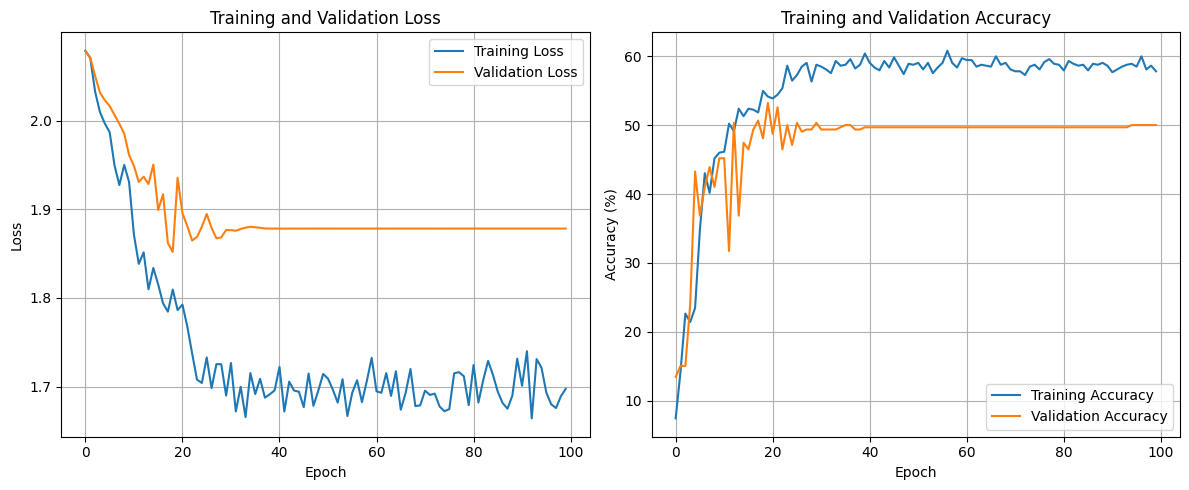

Training: 100%|██████████| 100/100 [01:07<00:00,  1.48it/s, train_loss=1.6974, val_loss=1.8784, train_acc=57.80%, val_acc=50.00%]


In [5]:
train_loss, val_loss = m3_model.fit(X_train, y_train, X_val, y_val)

## 07.5 - Evaluate the Model


Classification Report:
                                            precision    recall  f1-score   support

                          computer science       0.00      0.00      0.00        30
electrical engineering and systems science       0.20      1.00      0.33         1
                               mathematics       0.71      0.86      0.77        14
                                   physics       0.76      0.75      0.76        52
                      quantitative biology       0.17      0.60      0.27        10
                      quantitative finance       0.62      0.71      0.67         7
                                statistics       0.00      0.00      0.00         2

                                  accuracy                           0.54       116
                                 macro avg       0.35      0.56      0.40       116
                              weighted avg       0.48      0.54      0.50       116



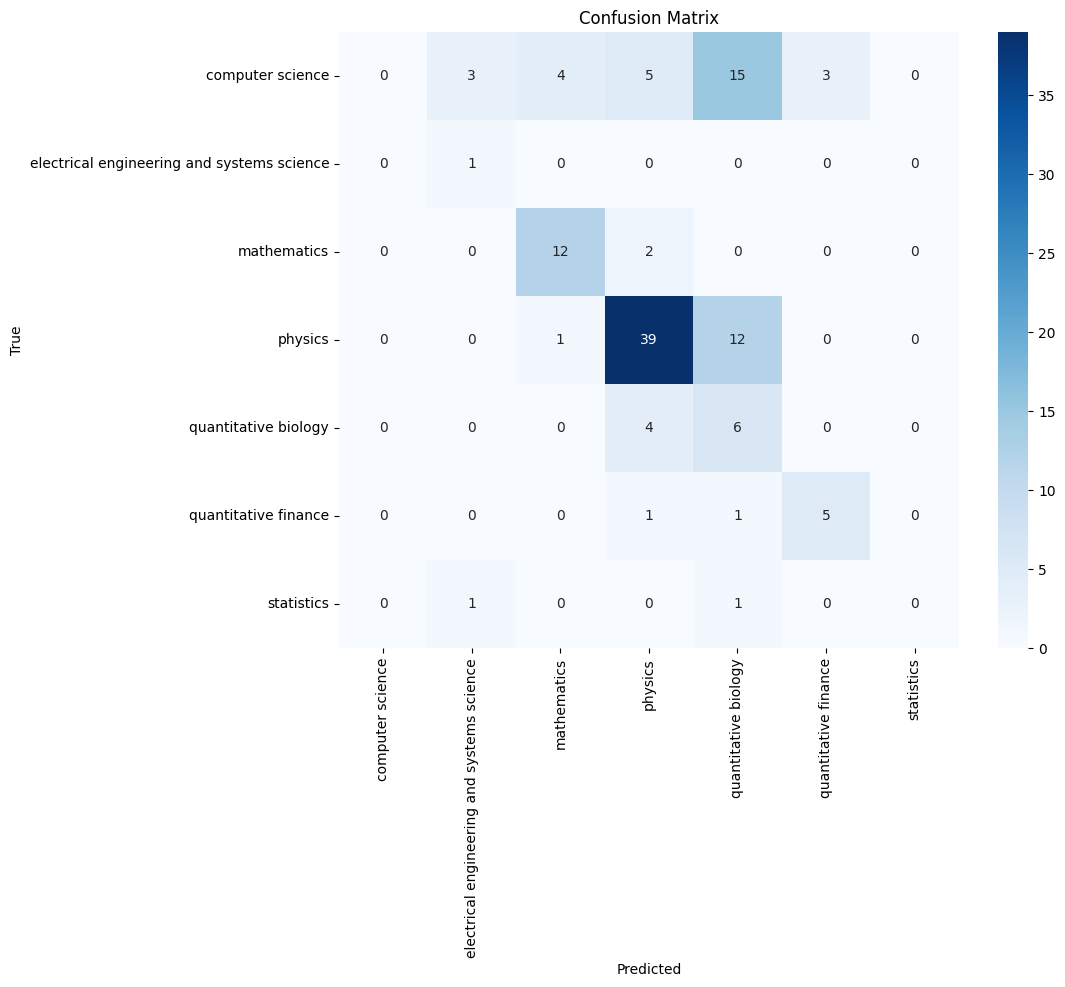

In [6]:
m3_model.predict(X_test, y_test)

## 07.6 - Save the Model

In [7]:
save_model(m3_model, '../models/m3_recurrent_neural_network.bin')


Model saved successfully to ../models/m3_recurrent_neural_network.bin
